# ScriptaFervere example workflow

The notebook present a simple modeling scenario that is handled by two classes fo ScriptaFervere: SimluationInput and Simple culture. The aim is to present some basic functionalities of the library, before heading to more extened usage.

First we import needed packages

In [24]:
import ScriptaFervere
from ScriptaFervere.Models import SimpleCulture
from ScriptaFervere.SimulationInput import SimulationInput
import numpy as np

In the first step we will initiate a SimulationInput instance. This class serves as a place where all parameters and equations aredefined and manipulated before being passed to instance from Models package.

In general when using SciptaFevere rules regarding notations, have to be scritly follwed, to ensure that everything is handled and loaded correctly. Thank to the notation classes can identify if the variable is a constants, parameter or the equation.

Notation rules can be summarized as follow:

    * Contants in most cases have a capital letter separated from one or multiple lowercases letters with a underscore:
        * K_s
        * Y_xs
        * K_i
    * Variables for initial conditions ( t=0 ) are denoted as a capital letter seprated from 0 with a underscore:
        * X_0
        * S_0
    * ODEs are denoted in d?dt where ? shall be the same as a capital letter specified as a varible:
        * dSdt
        * dXdt
    * Some exaptions:
        * mu_max - is a contants denoted with lowecase letters
        * mu - is an intermediate equation 

Numerical values can be passed as intigers or floats with regular or sceintific notation.

Equations are passed as strings.

Equation for mu can be either passed manually or chosen from a list of implemented growth models by passing a string ( more on different 
growth models in next notebooks)

It importnat to mention that ScriptaFeverve does not percetps units, thus needed transformations ( like hours to minute, gram to kilogram) have to be done before passing values to SimulationInput instance.

In [46]:
sim_input = SimulationInput(
                mu_max = 0.86, K_s = 0.0138,
                Y_xs = 1.28, K_d = 3.3e-3, 
                X_0 = 0.005, 
                growth= "monod_substrate",
                dXdt="mu * X - K_d")

To quick check what is in the input, the instance can be printed out.

As you can see in the first chunk number of constans, variables and equations are listed with number of defined. By default SimulationInput holds a list of some common variables and constants so you might quick check what might be missing.

In [38]:
print(sim_input)

SimulationInput instance 
11 constants, with 4 defined.
3 variables, with 1 defined.
3 equations, with 2 defined.

Variables at t_0
 X_0 = 0.005

Equations
 mu =  ( mu_max * S )  /  ( K_s + S ) 
 dXdt = mu * X - K_d
 dSdt  is Undefined!

Constans
 Y_xs = 1.28
 K_d = 0.0033
 mu_max = 0.86
 K_s = 0.0138

Not specified constants
K_i ;m ;n ;X_m ;S_m ;K_1 ;K_2

Not specified variables
S_0 ;P_0


sim_input

Now all passed variables and contatns can be acceses using SimulationInput attributes.

In [39]:
print(sim_input.constants ,"\n")
print(sim_input.variables ,"\n")

{'Y_xs': 1.28, 'K_d': 0.0033, 'mu_max': 0.86, 'K_i': None, 'm': None, 'n': None, 'K_s': 0.0138, 'X_m': None, 'S_m': None, 'K_1': None, 'K_2': None} 

{'X_0': 0.005, 'S_0': None, 'P_0': None} 



In the initalization done a few steps before initial subtrate concentation (S_0) as well as the ODE for substrate changed were not defined, making a model incomplete.

We can add variables like with regular dictionary ( the same comes to contants) but for equation a add_equation() has to be used.

It's important to pass an equation in correct format, otherwise an error will be rised.

In [47]:
sim_input.variables["S_0"] = 0.07

In [48]:
sim_input.add_equation("dSdt = -1/Y_xs * mu * X")

> dSdt =  - 1 / Y_xs * mu * X was added


In [49]:
print(sim_input)

SimulationInput instance 
11 constants, with 4 defined.
3 variables, with 2 defined.
3 equations, with 3 defined.

Variables at t_0
 X_0 = 0.005
 S_0 = 0.07

Equations
 mu =  ( mu_max * S )  /  ( K_s + S ) 
 dXdt = mu * X - K_d
 dSdt =  - 1 / Y_xs * mu * X

Constans
 Y_xs = 1.28
 K_d = 0.0033
 mu_max = 0.86
 K_s = 0.0138

Not specified constants
K_i ;m ;n ;X_m ;S_m ;K_1 ;K_2

Not specified variables
P_0


In [50]:
#inputs = test_SimulationInput.get_inputs()
time_arr = np.linspace(0,15,1000)
culture = SimpleCulture(time_arr, sim_input.get_inputs(), name="ExampleCulture")

In [51]:
culture.model

In [34]:
culture.solve()

 ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            4
   Variables    :            2
   Intermediates:            3
   Connections  :            0
   Equations    :            6
   Residuals    :            3
 
 --- Begin Pre-solve  -----------------------
  Original nvar:         7992
  Original neqn:         7992
  Pre-solve turn off DOF
  Pre-solve Variables:         7992
  Pre-solve Equations:         7992
  --- Solve block size:           16
 ----------------------------------------------
 Dynamic Simulation with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  6.60556E-29  2.80616E-03
    1  6.60556E-29  2.80616E-03
 Successful solution
 
 -----------------------------

In [35]:
import matplotlib.pyplot as plt

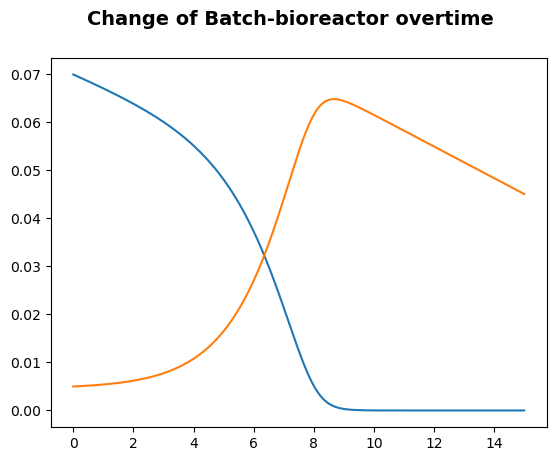

In [36]:
fig = plt.figure()
ax = fig.add_subplot()
fig.suptitle('Change of Batch-bioreactor overtime', fontsize=14, fontweight='bold')
#ax.set_title(f'$t_n$={len(self.model.time)}')
ax.plot(culture.model.time, culture.S.value,label='S - subtrate')
ax.plot(culture.model.time, culture.X.value,label='X - biomass')

To simplyfy comparing changes between multiple inputs SimulationInput instance contains inbound .copy() function that returns a seprate instance that contains all its variables, constans and equations. 

Lets explore that concent by creating a copy SimulationInputg isntance in which we increase maximal specific growth rate.

In [52]:
sim_input_new = sim_input.copy()
sim_input_new.constants["mu_max"] = 1
print(sim_input_new)

SimulationInput instance 
4 constants, with 4 defined.
2 variables, with 2 defined.
3 equations, with 3 defined.

Variables at t_0
 X_0 = 0.005
 S_0 = 0.07

Equations
 mu =  ( mu_max * S )  /  ( K_s + S ) 
 dXdt = mu * X - K_d
 dSdt =  - 1 / Y_xs * mu * X

Constans
 Y_xs = 1.28
 K_d = 0.0033
 mu_max = 1
 K_s = 0.0138


In [56]:
culture_new = SimpleCulture(time_arr, sim_input_new.get_inputs(), name="Higher mu max")
culture_new.solve()

 ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            4
   Variables    :            2
   Intermediates:            3
   Connections  :            0
   Equations    :            6
   Residuals    :            3
 
 --- Begin Pre-solve  -----------------------
  Original nvar:         7992
  Original neqn:         7992
  Pre-solve turn off DOF
  Pre-solve Variables:         7992
  Pre-solve Equations:         7992
  --- Solve block size:           16
 ----------------------------------------------
 Dynamic Simulation with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  2.09325E-28  3.26298E-03
    1  2.09325E-28  3.26298E-03
 Successful solution
 
 -----------------------------

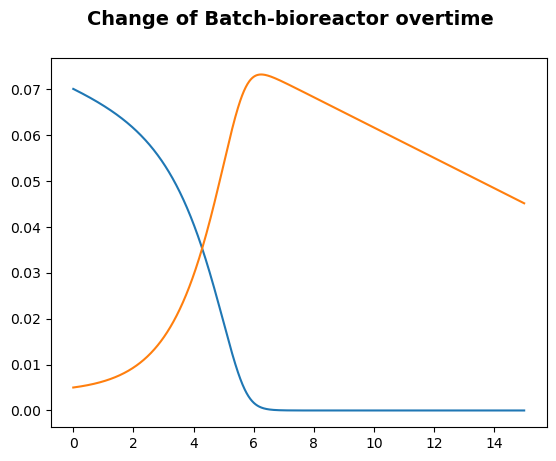

In [57]:
fig = plt.figure()
ax = fig.add_subplot()
fig.suptitle('Change of Batch-bioreactor overtime', fontsize=14, fontweight='bold')
#ax.set_title(f'$t_n$={len(self.model.time)}')
ax.plot(culture_new.model.time, culture_new.S.value,label='S - subtrate')
ax.plot(culture_new.model.time, culture_new.X.value,label='X - biomass')